In [154]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd


In [155]:
data=pd.read_csv('pps_data.csv',index_col=0)
target=pd.read_csv('pps_target.csv',index_col=0)
sample_submission=pd.read_csv('sample_submission_raw.csv',index_col=0)

In [156]:
data.index = pd.to_datetime(data.index,format='%Y-%m-%d')
target.index = pd.to_datetime(target.index,format='%Y-%m-%d')

In [157]:
data_mms=data.copy()

In [158]:
df_2018_raw = data[data.index.year == 2018]
df_2019_raw = data[data.index.year == 2019]
df_2020_raw = data[data.index.year == 2020]
df_2021_raw = data[data.index.year == 2021]

In [159]:
from sklearn.preprocessing import MinMaxScaler
mms_2018 = MinMaxScaler()
mms_2019 = MinMaxScaler()
mms_2020 = MinMaxScaler()
mms_2021 = MinMaxScaler()


df_2018_raw.iloc[:,:4] = mms_2018.fit_transform(df_2018_raw.iloc[:,:4])
df_2019_raw.iloc[:,:4] = mms_2019.fit_transform(df_2019_raw.iloc[:,:4])
df_2020_raw.iloc[:,:4] = mms_2020.fit_transform(df_2020_raw.iloc[:,:4])
df_2021_raw.iloc[:,:4] = mms_2021.fit_transform(df_2021_raw.iloc[:,:4])

In [160]:
df_2018_week_mean=df_2018_raw.groupby(['주','주말평일'])[['광진구','동대문구','성동구','중랑구']].mean().reset_index()
df_2019_week_mean=df_2019_raw.groupby(['주','주말평일'])[['광진구','동대문구','성동구','중랑구']].mean().reset_index()
df_2020_week_mean=df_2020_raw.groupby(['주','주말평일'])[['광진구','동대문구','성동구','중랑구']].mean().reset_index()
df_2021_week_mean=df_2021_raw.groupby(['주','주말평일'])[['광진구','동대문구','성동구','중랑구']].mean().reset_index()

In [161]:
# 광진구
temp_1=pd.merge(df_2018_week_mean.iloc[:,[0,1,2]],df_2019_week_mean.iloc[:,[0,1,2]],on=['주','주말평일'])
temp_2=pd.merge(df_2020_week_mean.iloc[:,[0,1,2]],df_2021_week_mean.iloc[:,[0,1,2]],on=['주','주말평일'])
result_1=pd.merge(temp_1,temp_2,on=['주','주말평일'])

In [162]:
# 동대문구
temp_1=pd.merge(df_2018_week_mean.iloc[:,[0,1,3]],df_2019_week_mean.iloc[:,[0,1,3]],on=['주','주말평일'])
temp_2=pd.merge(df_2020_week_mean.iloc[:,[0,1,3]],df_2021_week_mean.iloc[:,[0,1,3]],on=['주','주말평일'])
result_2=pd.merge(temp_1,temp_2,on=['주','주말평일'])

In [163]:
# 성동구
temp_1=pd.merge(df_2018_week_mean.iloc[:,[0,1,4]],df_2019_week_mean.iloc[:,[0,1,4]],on=['주','주말평일'])
temp_2=pd.merge(df_2020_week_mean.iloc[:,[0,1,4]],df_2021_week_mean.iloc[:,[0,1,4]],on=['주','주말평일'])
result_3=pd.merge(temp_1,temp_2,on=['주','주말평일'])

In [164]:
# 중랑구
temp_1=pd.merge(df_2018_week_mean.iloc[:,[0,1,5]],df_2019_week_mean.iloc[:,[0,1,5]],on=['주','주말평일'])
temp_2=pd.merge(df_2020_week_mean.iloc[:,[0,1,5]],df_2021_week_mean.iloc[:,[0,1,5]],on=['주','주말평일'])
result_4=pd.merge(temp_1,temp_2,on=['주','주말평일'])

In [165]:
result_1['mean_광진구'] = result_1.iloc[:,2:].mean(axis=1)
result_2['mean_동대문구'] = result_2.iloc[:,2:].mean(axis=1)
result_3['mean_성동구'] = result_3.iloc[:,2:].mean(axis=1)
result_4['mean_중랑구'] = result_4.iloc[:,2:].mean(axis=1)

In [166]:
result=pd.concat([result_1.loc[:,['주','주말평일','mean_광진구']],
                  result_2.loc[:,['주','주말평일','mean_동대문구']],
                  result_3.loc[:,['주','주말평일','mean_성동구']],
                  result_4.loc[:,['주','주말평일','mean_중랑구']]],axis=1)
result=result.iloc[:,[0,1,2,5,8,11]]
result

,주,주말평일,mean_광진구,mean_동대문구,mean_성동구,mean_중랑구
0,1,주말,0.102551,0.110144,0.090020,0.097063
1,1,평일,0.158235,0.169216,0.167271,0.144972
2,2,주말,0.121331,0.127660,0.105426,0.121485
3,2,평일,0.129167,0.136421,0.141860,0.118142
4,3,주말,0.168057,0.165944,0.164965,0.165005
...,...,...,...,...,...,...
98,50,주말,0.191042,0.225049,0.173257,0.217099
99,50,평일,0.325968,0.379592,0.318696,0.337889
100,51,주말,0.176767,0.203315,0.149763,0.204617
101,51,평일,0.300724,0.352451,0.307887,0.318637


In [167]:
df_2018_raw = data[data.index.year == 2018]
df_2019_raw = data[data.index.year == 2019]
df_2020_raw = data[data.index.year == 2020]
df_2021_raw = data[data.index.year == 2021]

In [168]:
df_2018_week_mean=df_2018_raw.groupby(['주','주말평일'])[['광진구','동대문구','성동구','중랑구']].mean().reset_index()
df_2019_week_mean=df_2019_raw.groupby(['주','주말평일'])[['광진구','동대문구','성동구','중랑구']].mean().reset_index()
df_2020_week_mean=df_2020_raw.groupby(['주','주말평일'])[['광진구','동대문구','성동구','중랑구']].mean().reset_index()
df_2021_week_mean=df_2021_raw.groupby(['주','주말평일'])[['광진구','동대문구','성동구','중랑구']].mean().reset_index()

In [169]:
from sklearn.preprocessing import MinMaxScaler

mms1 = MinMaxScaler()
mms1.fit(df_2018_week_mean.iloc[:,2:])

mms2 = MinMaxScaler()
mms2.fit(df_2019_week_mean.iloc[:,2:])

mms3 = MinMaxScaler()
mms3.fit(df_2020_week_mean.iloc[:,2:])

mms4 = MinMaxScaler()
mms4.fit(df_2021_week_mean.iloc[:,2:])

MinMaxScaler()

In [170]:
result_temp1 = result.copy()
result_temp1.iloc[:,2:] = mms1.inverse_transform(result_temp1.iloc[:,2:].values)
result_temp2 = result.copy()
result_temp2.iloc[:,2:] = mms2.inverse_transform(result_temp2.iloc[:,2:].values)
result_temp3 = result.copy()
result_temp3.iloc[:,2:] = mms3.inverse_transform(result_temp3.iloc[:,2:].values)
result_temp4 = result.copy()
result_temp4.iloc[:,2:] = mms4.inverse_transform(result_temp4.iloc[:,2:].values)

In [171]:
result_temp1['year'] = 1
result_temp2['year'] = 2
result_temp3['year'] = 3
result_temp4['year'] = 4

In [172]:
diff_동대문=pd.concat([result_temp1.iloc[:,5],result_temp2.iloc[:,5],result_temp3.iloc[:,5],result_temp4.iloc[:,5]],axis=1).diff(axis=1)

In [173]:
diff_광진구=pd.concat([result_temp1.iloc[:,2],result_temp2.iloc[:,2],result_temp3.iloc[:,2],result_temp4.iloc[:,2]],axis=1).diff(axis=1)
diff_동대문구=pd.concat([result_temp1.iloc[:,3],result_temp2.iloc[:,3],result_temp3.iloc[:,3],result_temp4.iloc[:,3]],axis=1).diff(axis=1)
diff_성동구=pd.concat([result_temp1.iloc[:,4],result_temp2.iloc[:,4],result_temp3.iloc[:,4],result_temp4.iloc[:,4]],axis=1).diff(axis=1)
diff_중랑구=pd.concat([result_temp1.iloc[:,5],result_temp2.iloc[:,5],result_temp3.iloc[:,5],result_temp4.iloc[:,5]],axis=1).diff(axis=1)

In [174]:
diff_광진_main=((diff_광진구.iloc[:,1] * 3) + (diff_광진구.iloc[:,1] * 3) + (diff_광진구.iloc[:,1] * 3))/9
diff_동대문_main=((diff_동대문구.iloc[:,1] * 3) + (diff_동대문구.iloc[:,1] * 3) + (diff_동대문구.iloc[:,1] * 3))/9
diff_성동_main=((diff_성동구.iloc[:,1] * 3) + (diff_성동구.iloc[:,1] * 3) + (diff_성동구.iloc[:,1] * 3))/9
diff_중랑_main=((diff_중랑구.iloc[:,1] * 3) + (diff_중랑구.iloc[:,1] * 3) + (diff_중랑구.iloc[:,1] * 3))/9

In [175]:
diff_=pd.concat([diff_광진_main,diff_동대문_main,diff_성동_main,diff_중랑_main],axis=1)

In [176]:
result.iloc[:,2:]=mms_2021.inverse_transform(result.iloc[:,2:])

In [182]:
df_2021_week_mean

,주,주말평일,광진구,동대문구,성동구,중랑구
0,1,주말,0.954000,0.972000,0.851000,0.615000
1,1,평일,1.928800,1.648400,1.744400,1.032400
2,2,주말,1.879000,1.845000,1.614000,1.272000
3,2,평일,2.212400,1.966800,2.184000,1.284000
4,3,주말,4.368000,3.460000,4.225000,2.520000
...,...,...,...,...,...,...
99,50,평일,5.691200,4.939200,4.574800,3.186400
100,51,주말,1.783000,1.426000,1.070000,1.125000
101,51,평일,5.991200,5.163200,5.117600,3.500000
102,52,평일,4.178000,3.522800,3.286400,2.445200


In [185]:
(result.iloc[:,2:] + diff_)*1.3

,mean_광진구,mean_동대문구,mean_성동구,mean_중랑구
0,3.764660,2.670073,2.555694,1.863653
1,5.159390,3.743706,4.087319,2.466685
2,4.235040,2.988425,2.861152,2.171055
3,4.431316,3.147653,3.583508,2.128973
4,5.405415,3.684243,4.041594,2.718834
...,...,...,...,...
98,5.981122,4.758476,4.206005,3.374532
99,9.360684,7.567295,7.089578,4.894899
100,5.623585,4.363458,3.740206,3.217421
101,8.728392,7.074004,6.875263,4.652580


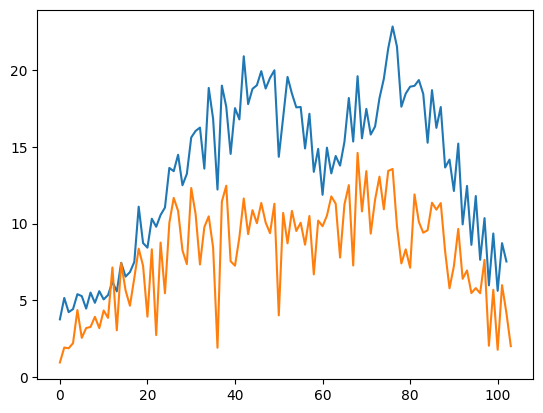

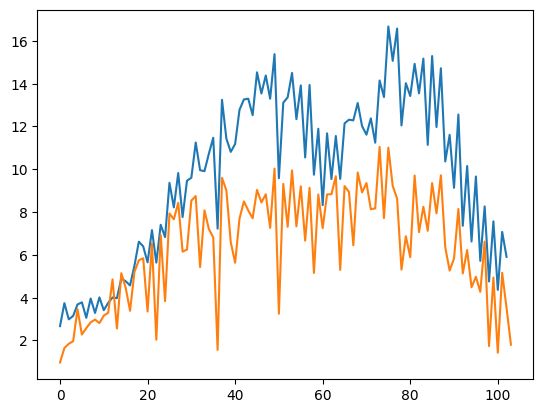

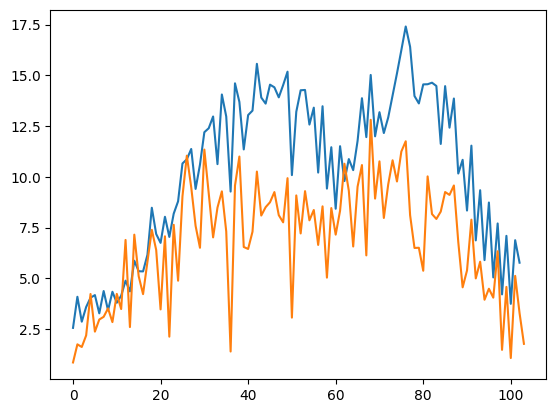

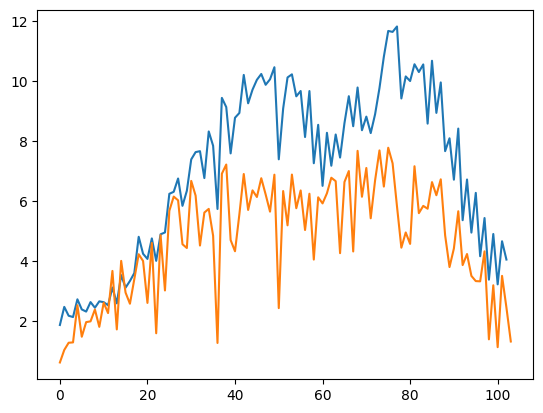

In [186]:
for i in range(2,6):
    (((result.iloc[:,2:] + diff_)*1.3).iloc[:,i-2]).plot()
    df_2021_week_mean.iloc[:,i].plot()
    plt.show()

In [179]:
sample_submission.to_csv('team_final_rfr.csv',index=False)

In [180]:
sample_submission

,일시,광진구,동대문구,성동구,중랑구
0,20220101,0,0,0,0
1,20220102,0,0,0,0
2,20220103,0,0,0,0
3,20220104,0,0,0,0
4,20220105,0,0,0,0
...,...,...,...,...,...
329,20221126,0,0,0,0
330,20221127,0,0,0,0
331,20221128,0,0,0,0
332,20221129,0,0,0,0
